# Import libraries

In [ ]:
#!pip install -U pandas-profiling[notebook]
#!pip install koalas
#!jupyter nbextension enable --py widgetsnbextension
#!pip install sweetviz

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 2.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import numpy as np
import pandas as pd
import random
from pandas_profiling import ProfileReport
import sweetviz as sv

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib notebook
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [ ]:
# change working directory

%cd /datasets/cms
!ls -art

/content/drive/MyDrive/Colab Notebooks
 MUP_PHY_R21_P04_V10_D19_Prov_Svc.csv
 MUP_PHY_R21_P04_V10_D19_Geo.csv
 MUP_PHY_R21_P04_V10_D19_Prov.csv
 zip_lat_long.xlsx
 Report.html
'Supervised and Unsupervised learning on CMS Data.ipynb'


In [ ]:
#df_prov_svc = pd.read_csv('MUP_PHY_R21_P04_V10_D19_Prov_Svc.csv', dtype="string", encoding='latin-1')
#df_prov_svc.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,Rndrng_Prvdr_Cntry,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003000126,Enkeshafi,Ardalan,<NA>,M.D.,M,I,900 Seton Dr,<NA>,Cumberland,MD,24,21502,1,Metropolitan area core: primary flow within an...,US,Internal Medicine,Y,99217,Hospital observation care on day of discharge,N,F,40,40,40,232.275,72.59,57.87,58.19175
1,1003000126,Enkeshafi,Ardalan,<NA>,M.D.,M,I,900 Seton Dr,<NA>,Cumberland,MD,24,21502,1,Metropolitan area core: primary flow within an...,US,Internal Medicine,Y,99220,"Hospital observation care, typically 70 minutes",N,F,25,25,25,712.8,186.7252,148.8516,147.77
2,1003000126,Enkeshafi,Ardalan,<NA>,M.D.,M,I,900 Seton Dr,<NA>,Cumberland,MD,24,21502,1,Metropolitan area core: primary flow within an...,US,Internal Medicine,Y,99221,"Initial hospital inpatient care, typically 30 ...",N,F,24,24,24,320.16666667,101.12125,80.615833333,80.81
3,1003000126,Enkeshafi,Ardalan,<NA>,M.D.,M,I,900 Seton Dr,<NA>,Cumberland,MD,24,21502,1,Metropolitan area core: primary flow within an...,US,Internal Medicine,Y,99223,"Initial hospital inpatient care, typically 70 ...",N,F,157,158,158,651.41772152,200.93,160.19,161.06
4,1003000126,Enkeshafi,Ardalan,<NA>,M.D.,M,I,900 Seton Dr,<NA>,Cumberland,MD,24,21502,1,Metropolitan area core: primary flow within an...,US,Internal Medicine,Y,99232,"Subsequent hospital inpatient care, typically ...",N,F,117,205,205,245.61463415,72.756390244,58.005560976,57.93


In [ ]:
df_prov = pd.read_csv('MUP_PHY_R21_P04_V10_D19_Prov.csv', dtype="string", encoding='latin-1')

df_prov.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,Rndrng_Prvdr_Cntry,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Drug_Sprsn_Ind,Drug_Tot_HCPCS_Cds,Drug_Tot_Benes,Drug_Tot_Srvcs,Drug_Sbmtd_Chrg,Drug_Mdcr_Alowd_Amt,Drug_Mdcr_Pymt_Amt,Drug_Mdcr_Stdzd_Amt,Med_Sprsn_Ind,Med_Tot_HCPCS_Cds,Med_Tot_Benes,Med_Tot_Srvcs,Med_Sbmtd_Chrg,Med_Mdcr_Alowd_Amt,Med_Mdcr_Pymt_Amt,Med_Mdcr_Stdzd_Amt,Bene_Avg_Age,Bene_Age_LT_65_Cnt,Bene_Age_65_74_Cnt,Bene_Age_75_84_Cnt,Bene_Age_GT_84_Cnt,Bene_Feml_Cnt,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_API_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_NatInd_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_CC_AF_Pct,Bene_CC_Alzhmr_Pct,Bene_CC_Asthma_Pct,Bene_CC_Cncr_Pct,Bene_CC_CHF_Pct,Bene_CC_CKD_Pct,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,<NA>,M.D.,M,I,900 Seton Dr,<NA>,Cumberland,MD,24,21502,1,Metropolitan area core: primary flow within an...,US,Internal Medicine,Y,18,610,1392,519136,156626.32,124877.67,125266.1,<NA>,0,0,0,0,0,0,0,<NA>,18,610,1392,519136,156626.32,124877.67,125266.1,75,82,200,184,144,345,265,402,175,<NA>,15,<NA>,<NA>,106,504,0.3,0.37,0.14,0.19,0.51,0.7,0.36,0.41,0.54,0.75,0.75,0.61,0.11,0.54,0.08,0.21,2.5917
1,1003000134,Cibull,Thomas,L,M.D.,M,I,2650 Ridge Ave,Evanston Hospital,Evanston,IL,17,60201,1,Metropolitan area core: primary flow within an...,US,Pathology,Y,20,3614,7835,1213264,298905.09,228078.56,218268.63,<NA>,0,0,0,0,0,0,0,<NA>,20,3614,7835,1213264,298905.09,228078.56,218268.63,76,97,1623,1333,561,1767,1847,3312,41,62,43,0,156,195,3419,0.12,0.07,0.04,0.13,0.12,0.22,0.07,0.16,0.21,0.53,0.53,0.26,0.1,0.41,0.01,0.03,1.1246
2,1003000142,Khalil,Rashid,<NA>,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,OH,39,43623,1,Metropolitan area core: primary flow within an...,US,Anesthesiology,Y,54,264,2530,215156,113631.83,83582.18,88998.87,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,#,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,65,116,99,37,12,143,121,188,57,<NA>,<NA>,<NA>,<NA>,93,171,0.07,0.09,0.13,0.08,0.25,0.32,0.28,0.41,0.34,0.51,0.7,0.32,0.06,0.75,0.05,0.05,1.6146
3,1003000423,Velotta,Jennifer,A,M.D.,F,I,11100 Euclid Ave,<NA>,Cleveland,OH,39,44106,1,Metropolitan area core: primary flow within an...,US,Obstetrics & Gynecology,Y,24,74,897,23150,11089.67,9007.31,9376.96,*,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,#,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,66,16,43,<NA>,<NA>,74,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.22,0.19,0.43,0.46,<NA>,<NA>,0.43,0,0,0.9065
4,1003000480,Rothchild,Kevin,B,MD,M,I,12605 E 16th Ave,<NA>,Aurora,CO,08,80045,1,Metropolitan area core: primary flow within an...,US,General Surgery,Y,30,104,159,210964.25,40069.88,31113.49,30002.44,<NA>,0,0,0,0,0,0,0,<NA>,30,104,159,210964.25,40069.88,31113.49,30002.44,64,45,40,<NA>,<NA>,60,44,73,16,<NA>,<NA>,<NA>,<NA>,44,60,0.11,<NA>,0.17,0.12,0.21,0.37,0.14,0.55,0.38,0.38,0.67,0.29,0.15,0.53,<NA>,<NA>,1.7191


In [ ]:
df_prov['Rndrng_Prvdr_Zip5'] = df_prov['Rndrng_Prvdr_Zip5'].astype(str)

df_prov['Tot_Benes'] = df_prov['Tot_Benes'].fillna('0')
df_prov['Tot_Srvcs'] = df_prov['Tot_Srvcs'].fillna('0')
df_prov['Tot_Sbmtd_Chrg'] = df_prov['Tot_Sbmtd_Chrg'].fillna('0')
df_prov['Tot_Mdcr_Alowd_Amt'] = df_prov['Tot_Mdcr_Alowd_Amt'].fillna('0')
df_prov['Tot_Mdcr_Pymt_Amt'] = df_prov['Tot_Mdcr_Pymt_Amt'].fillna('0')
df_prov['Tot_Mdcr_Stdzd_Amt'] = df_prov['Tot_Mdcr_Stdzd_Amt'].fillna('0')

df_prov['Drug_Tot_Benes'] = df_prov['Drug_Tot_Benes'].fillna('0')
df_prov['Drug_Tot_Srvcs'] = df_prov['Drug_Tot_Srvcs'].fillna('0')
df_prov['Med_Sbmtd_Chrg'] = df_prov['Med_Sbmtd_Chrg'].fillna('0')
df_prov['Med_Mdcr_Alowd_Amt'] = df_prov['Med_Mdcr_Alowd_Amt'].fillna('0')
df_prov['Med_Mdcr_Pymt_Amt'] = df_prov['Med_Mdcr_Pymt_Amt'].fillna('0')
df_prov['Med_Mdcr_Stdzd_Amt'] = df_prov['Med_Mdcr_Stdzd_Amt'].fillna('0')

df_prov['Tot_Benes'] = df_prov['Tot_Benes'].astype(float)
df_prov['Tot_Srvcs'] = df_prov['Tot_Srvcs'].astype(float)
df_prov['Tot_Sbmtd_Chrg'] = df_prov['Tot_Sbmtd_Chrg'].astype(float)
df_prov['Tot_Mdcr_Alowd_Amt'] = df_prov['Tot_Mdcr_Alowd_Amt'].astype(float)
df_prov['Tot_Mdcr_Pymt_Amt'] = df_prov['Tot_Mdcr_Pymt_Amt'].astype(float)
df_prov['Tot_Mdcr_Stdzd_Amt'] = df_prov['Tot_Mdcr_Stdzd_Amt'].astype(float)

df_prov['Drug_Tot_Benes'] = df_prov['Drug_Tot_Benes'].astype(float)
df_prov['Drug_Tot_Srvcs'] = df_prov['Drug_Tot_Srvcs'].astype(float)
df_prov['Med_Sbmtd_Chrg'] = df_prov['Med_Sbmtd_Chrg'].astype(float)
df_prov['Med_Mdcr_Alowd_Amt'] = df_prov['Med_Mdcr_Alowd_Amt'].astype(float)
df_prov['Med_Mdcr_Pymt_Amt'] = df_prov['Med_Mdcr_Pymt_Amt'].astype(float)
df_prov['Med_Mdcr_Stdzd_Amt'] = df_prov['Med_Mdcr_Stdzd_Amt'].astype(float)

In [ ]:
#df_geo = pd.read_csv('MUP_PHY_R21_P04_V10_D19_Geo.csv', dtype="string", encoding='latin-1')

#df_geo.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,<NA>,National,0003M,"Liver disease, ten biochemical assays (alt, a2...",N,O,12,41,42,42,680.54714286,438.21166667,438.21166667,447.51357143
1,National,<NA>,National,0005U,Test for detecting genes associated with prost...,N,O,1,539,540,540,795,744.8,744.8,744.8
2,National,<NA>,National,00100,Anesthesia for procedure on salivary gland wit...,N,F,9574,8232,12019,12016,1959.5081255,237.03888676,187.54344288,186.4306964
3,National,<NA>,National,00100,Anesthesia for procedure on salivary gland wit...,N,O,91,59,99,99,1409.5910101,170.32555556,134.01565657,129.77858586
4,National,<NA>,National,00102,Anesthesia for procedure to repair lip defect ...,N,F,63,48,70,70,1210.9484286,165.06457143,129.08271429,128.45257143


# EDA

In [ ]:
# Use random sample for exploration
filename = "MUP_PHY_R21_P04_V10_D19_Prov.csv"
p = 0.15  # 15% of the lines
# keep the header, then take only 15% of lines
# if random from [0,1] interval is greater than 0.15 the row will be skipped
df = pd.read_csv(
         filename,
         header=0, 
         skiprows = lambda i: i>0 and random.random() > p)

df['Rndrng_Prvdr_Zip5'] = df['Rndrng_Prvdr_Zip5'].astype(str)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#profile = ProfileReport(df_prov_svc, title="Pandas Profiling Report")

In [ ]:
#profile

default


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/basic.py:300: UserWarning: %profile is now deprecated. Please use get_ipython().profile instead.
  warn("%profile is now deprecated. Please use get_ipython().profile instead.")


In [ ]:
df['Rndrng_Prvdr_Zip5'] = df['Rndrng_Prvdr_Zip5'].astype(str)

NameError: ignored

In [ ]:
report = sv.analyze(df)
report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import IPython
IPython.display.HTML('Report.html')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#df_geo.count()

NameError: ignored

In [ ]:
df_prov.count()

Rndrng_NPI                    1155870
Rndrng_Prvdr_Last_Org_Name    1155870
Rndrng_Prvdr_First_Name       1095941
Rndrng_Prvdr_MI                760923
Rndrng_Prvdr_Crdntls          1033638
                               ...   
Bene_CC_Opo_Pct                740060
Bene_CC_RAOA_Pct              1049296
Bene_CC_Sz_Pct                 514185
Bene_CC_Strok_Pct              625934
Bene_Avg_Risk_Scre            1155870
Length: 73, dtype: int64

In [ ]:
df_prov.columns

Index(['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind',
       'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs',
       'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age', 'Bene_Age_LT_65_

# Supervised Learning

# Unsupervised Learning

In [ ]:
df_prov_cluster = df_prov.sample(100000)
df_prov_cluster = df_prov_cluster[['Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name',
       'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr',
       'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2',
       'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA',
       'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind',
       'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs',
       'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt']]
df_prov_cluster.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,Rndrng_Prvdr_Cntry,Rndrng_Prvdr_Type,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Drug_Sprsn_Ind,Drug_Tot_HCPCS_Cds,Drug_Tot_Benes,Drug_Tot_Srvcs,Drug_Sbmtd_Chrg,Drug_Mdcr_Alowd_Amt,Drug_Mdcr_Pymt_Amt,Drug_Mdcr_Stdzd_Amt,Med_Sprsn_Ind,Med_Tot_HCPCS_Cds,Med_Tot_Benes,Med_Tot_Srvcs,Med_Sbmtd_Chrg,Med_Mdcr_Alowd_Amt,Med_Mdcr_Pymt_Amt,Med_Mdcr_Stdzd_Amt
156123,1134296395,Wishnov,Bruce,<NA>,DO,M,I,22065 State Road 7,<NA>,Boca Raton,FL,12,33428,1,Metropolitan area core: primary flow within an...,US,Family Practice,Y,54,442.0,3076.0,371042.63,223153.13,177551.28,170545.83,<NA>,13,40.0,48.0,1993,1218.57,1170.6,1170.6,<NA>,41,442,3028,369049.63,221934.56,176380.68,169375.23
929638,1801324199,Thompkins,Terrie,T,MD,F,I,4950 Essen Ln Ste 400,<NA>,Baton Rouge,LA,22,70809,1,Metropolitan area core: primary flow within an...,US,Nurse Practitioner,Y,17,30.0,42.0,9575.00,2816.02,2058.40,2288.59,<NA>,0,0.0,0.0,0,0,0,0,<NA>,17,30,42,9575.00,2816.02,2058.40,2288.59
433604,1376635334,Chiou,Billy,Y,MD,M,I,211 Hospital Rd,<NA>,Red Bay,AL,01,35582,10,Rural areas: primary flow to a tract outside a...,US,Emergency Medicine,Y,21,164.0,208.0,302677.00,26691.19,19969.96,20000.77,<NA>,0,0.0,0.0,0,0,0,0,<NA>,21,164,208,302677.00,26691.19,19969.96,20000.77
371611,1326028317,Trentacosti,Cynthia,D,D.D.S,F,I,600 E Marshall St Ste 106,<NA>,West Chester,PA,42,19380,1,Metropolitan area core: primary flow within an...,US,Oral Surgery (Dentist only),Y,19,72.0,113.0,22794.00,13636.02,10181.67,9620.87,<NA>,0,0.0,0.0,0,0,0,0,<NA>,19,72,113,22794.00,13636.02,10181.67,9620.87
1018268,1881075059,Gill-Henry,Deborah,A,NP,F,I,7910 W Jefferson Blvd Ste 200,<NA>,Fort Wayne,IN,18,46804,1,Metropolitan area core: primary flow within an...,US,Nurse Practitioner,Y,14,37.0,109.0,15566.33,6335.83,4613.44,4923.21,*,<NA>,0.0,0.0,<NA>,<NA>,<NA>,<NA>,#,<NA>,<NA>,<NA>,0.00,0.00,0.00,0.00


In [ ]:
df_prov_cluster['Tot_Benes'].describe()

count    100000.000000
mean        339.166050
std        2453.048725
min          11.000000
25%          63.000000
50%         163.000000
75%         353.000000
max      667790.000000
Name: Tot_Benes, dtype: float64

In [ ]:
q1 = df_prov_cluster['Tot_Benes'].quantile(0.25)
q2 = df_prov_cluster['Tot_Benes'].quantile(0.50)
q3 = df_prov_cluster['Tot_Benes'].quantile(0.75)
print(q1,q2,q3)

63.0 163.0 353.0


In [ ]:
# Using quantiles to create groups of patients into high, medium, low for EDA
df_prov_cluster['Tot_Benes_group']=np.where(df_prov_cluster['Tot_Benes']>=q3,'High',(np.where(df_prov_cluster['Tot_Benes']>=q1,'Medium','Low')))

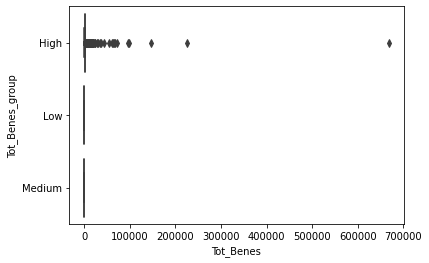

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Tot_Benes', y='Tot_Benes_group', data=df_prov_cluster)

**Clustering**

In [ ]:
# Features and Target

X = df_prov_cluster[['Rndrng_NPI','Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind',
       'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs',
       'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt',
       'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds',
       'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt']]

#y = df_prov_cluster[['Tot_Benes']]

In [ ]:
### Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
imp_features = ['Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg']

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X[imp_features])

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

Text(0.5, 1.0, 'The Elbow Method')

Text(0.5, 0, 'Number of clusters')

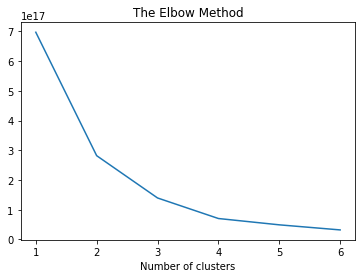

In [ ]:
plot=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X[imp_features])
    plot.append(kmeans.inertia_)

number_clusters = range(1,7)
plt.plot(number_clusters,plot)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

In [ ]:
kmeans = KMeans(3)
kmeans.fit(scaled_data)

KMeans(n_clusters=3)

In [ ]:
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
X['cluster_id'] = clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.head()

,Rndrng_NPI,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Drug_Sprsn_Ind,Drug_Tot_HCPCS_Cds,Drug_Tot_Benes,Drug_Tot_Srvcs,Drug_Sbmtd_Chrg,Drug_Mdcr_Alowd_Amt,Drug_Mdcr_Pymt_Amt,Drug_Mdcr_Stdzd_Amt,Med_Sprsn_Ind,Med_Tot_HCPCS_Cds,Med_Tot_Benes,Med_Tot_Srvcs,Med_Sbmtd_Chrg,Med_Mdcr_Alowd_Amt,Med_Mdcr_Pymt_Amt,Med_Mdcr_Stdzd_Amt,cluster_id
156123,1134296395,442.0,3076.0,371042.63,223153.13,177551.28,170545.83,<NA>,13,40.0,48.0,1993,1218.57,1170.6,1170.6,<NA>,41,442,3028,369049.63,221934.56,176380.68,169375.23,0
929638,1801324199,30.0,42.0,9575.00,2816.02,2058.40,2288.59,<NA>,0,0.0,0.0,0,0,0,0,<NA>,17,30,42,9575.00,2816.02,2058.40,2288.59,0
433604,1376635334,164.0,208.0,302677.00,26691.19,19969.96,20000.77,<NA>,0,0.0,0.0,0,0,0,0,<NA>,21,164,208,302677.00,26691.19,19969.96,20000.77,0
371611,1326028317,72.0,113.0,22794.00,13636.02,10181.67,9620.87,<NA>,0,0.0,0.0,0,0,0,0,<NA>,19,72,113,22794.00,13636.02,10181.67,9620.87,0
1018268,1881075059,37.0,109.0,15566.33,6335.83,4613.44,4923.21,*,<NA>,0.0,0.0,<NA>,<NA>,<NA>,<NA>,#,<NA>,<NA>,<NA>,0.00,0.00,0.00,0.00,0


In [ ]:
X.groupby('cluster_id').mean()

,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Drug_Tot_Benes,Drug_Tot_Srvcs,Med_Sbmtd_Chrg,Med_Mdcr_Alowd_Amt,Med_Mdcr_Pymt_Amt,Med_Mdcr_Stdzd_Amt
cluster_id,,,,,,,,,,,,
0,330.090436,2.452487e+03,3.531848e+05,1.151425e+05,9.027927e+04,8.992584e+04,23.623864,1.065133e+03,2.854763e+05,8.814697e+04,6.888927e+04,6.845647e+04
1,667790.000000,7.065291e+06,6.448086e+08,9.053435e+07,9.049402e+07,9.063706e+07,0.000000,0.000000e+00,6.448086e+08,9.053435e+07,9.049402e+07,9.063706e+07
2,40347.000000,4.922327e+06,4.849550e+07,1.322421e+07,1.185239e+07,1.183959e+07,99.333333,2.262248e+06,3.637856e+07,6.975868e+06,6.874451e+06,6.858648e+06


In [ ]:
X['cluster_id'].value_counts()

0    99993
2        6
1        1
Name: cluster_id, dtype: int64

In [ ]:
df_prov_cluster['cluster_id']=X['cluster_id']

**Silhoute Evaluation**

For 2 clusters, we have silhoute score: [0.9990001421750971]
For 3 clusters, we have silhoute score: [0.9990001421750971, 0.9971404044809521]
For 4 clusters, we have silhoute score: [0.9990001421750971, 0.9971404044809521, 0.9783786965656909]
For 5 clusters, we have silhoute score: [0.9990001421750971, 0.9971404044809521, 0.9783786965656909, 0.9651989194420761]
For 6 clusters, we have silhoute score: [0.9990001421750971, 0.9971404044809521, 0.9783786965656909, 0.9651989194420761, 0.9652101811174943]
For 7 clusters, we have silhoute score: [0.9990001421750971, 0.9971404044809521, 0.9783786965656909, 0.9651989194420761, 0.9652101811174943, 0.9266437510824376]
For 8 clusters, we have silhoute score: [0.9990001421750971, 0.9971404044809521, 0.9783786965656909, 0.9651989194420761, 0.9652101811174943, 0.9266437510824376, 0.9082626589606129]


Text(0.5, 1.0, 'Custer Evaluation - Silhoute')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Silhoute Score')

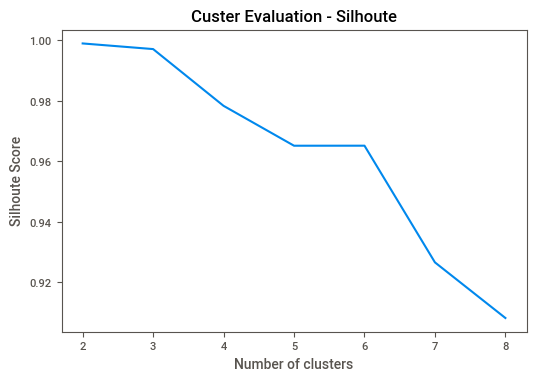

In [ ]:
from sklearn.metrics import silhouette_score

clusters = range(2,7)
silhoute_val = []

for i in clusters:
    kmeans = KMeans(i, init='k-means++', max_iter=100, n_init=10, random_state=0)
    cls = kmeans.fit_predict(scaled_data)
    silhoute_val.append(silhouette_score(scaled_data, cls))
    print("For {} clusters, we have silhoute score: {}".format(i, silhoute_val))

plt.plot(clusters,silhoute_val)
plt.title('Custer Evaluation - Silhoute')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoute Score')

**Agglomerative (Hierarchical) Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

aggClusters = AgglomerativeClustering(n_clusters=4).fit_predict(scaled_data)
#clusters.labels_
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(scaled_data))
plt.show()

**Visualization**

In [ ]:
df_prov_cluster_viz = df_prov_cluster[['Rndrng_NPI','Rndrng_Prvdr_Zip5','Tot_Benes','cluster_id']]
df_prov_cluster_viz_zip = df_prov_cluster_viz.groupby('Rndrng_Prvdr_Zip5').agg(
    count_hcps = pd.NamedAgg(column="Rndrng_NPI", aggfunc="count"),
    total_pts = pd.NamedAgg(column="Tot_Benes", aggfunc="sum"))
df_prov_cluster_viz_zip.count()

count_hcps    12200
total_pts     12200
dtype: int64

In [ ]:
df_prov_cluster_viz_zip.head()

,count_hcps,total_pts
Rndrng_Prvdr_Zip5,,
00601,1,41.0
00602,7,362.0
00603,7,322.0
00612,12,584.0
00613,1,17.0


In [ ]:
df_zip = pd.read_excel("zip_lat_long.xlsx", dtype={'ZIP': str, 'CNTRY_FIPS': str})
df_zip.head()

,ZIP,CITY,STATE,longitude,latitude,CNTRY_FIPS
0,00501,HOLTSVILLE,NY,-73.045936,40.810747,36103
1,00544,HOLTSVILLE,NY,-73.045936,40.810747,36103
2,00601,ADJUNTAS,PR,-66.750909,18.181183,72001
3,00602,AGUADA,PR,-67.182899,18.364143,72003
4,00603,AGUADILLA,PR,-67.112863,18.448861,72005


In [ ]:
df_prov_cluster_viz_zip = df_prov_cluster_viz_zip.merge(df_zip,left_on = 'Rndrng_Prvdr_Zip5',right_on = 'ZIP',how = 'left')
df_prov_cluster_viz_zip.head()

,count_hcps,total_pts,ZIP,CITY,STATE,longitude,latitude,CNTRY_FIPS
0,1,41.0,00601,ADJUNTAS,PR,-66.750909,18.181183,72001
1,7,362.0,00602,AGUADA,PR,-67.182899,18.364143,72003
2,7,322.0,00603,AGUADILLA,PR,-67.112863,18.448861,72005
3,12,584.0,00612,ARECIBO,PR,-66.675261,18.404316,72013
4,1,17.0,00613,ARECIBO,PR,-66.675261,18.404316,72013


In [ ]:
df_prov_cluster_viz_zip.dropna(inplace=True)

In [ ]:

import altair as alt
from vega_datasets import data
alt.data_transformers.disable_max_rows()
states = alt.topo_feature(data.us_10m.url, feature="states")

DataTransformerRegistry.enable('default')

In [ ]:
background = alt.Chart(states).mark_geoshape(
    fill="lightgray",
    stroke="white"
).properties(
    width=750,
    height=500
).project("albersUsa")

points1 = alt.Chart(df_prov_cluster_viz_zip).mark_circle(opacity=0.7).encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    color=alt.Color("cluster_id:N"),
    size=alt.Size("count_hcps:Q"),
    #size=alt.Size("count_hcps:Q", scale=alt.Scale(range=[0, 100]), legend=None),
    #order=alt.Order("STATE:N", sort="descending"),
    tooltip=["STATE:N", "count_hcps:Q", "total_pts:Q"]
)

geo_chart = (background + points1).configure_view(stroke=None)

In [ ]:
geo_chart

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_prov_cluster_viz_county = df_prov_cluster_viz_zip.groupby('CNTRY_FIPS').agg(
    total_hcps = pd.NamedAgg(column="count_hcps", aggfunc="sum"),
    total_pts = pd.NamedAgg(column="total_pts", aggfunc="sum")).reset_index()
df_prov_cluster_viz_county.count()

CNTRY_FIPS    2665
total_hcps    2665
total_pts     2665
dtype: int64

In [ ]:
df_prov_cluster_viz_county.head()

,CNTRY_FIPS,total_hcps,total_pts
0,01001,9,2069.0
1,01003,51,13633.0
2,01005,4,1313.0
3,01007,2,107.0
4,01009,2,385.0


In [ ]:
df_prov_cluster_viz_county.describe()

,total_hcps,total_pts
count,2665.000000,2.665000e+03
mean,37.491182,1.271579e+04
std,110.948782,4.397946e+04
min,1.000000,1.100000e+01
25%,2.000000,3.180000e+02
50%,6.000000,1.248000e+03
75%,23.000000,7.362000e+03
max,2123.000000,1.360698e+06


In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
import plotly.graph_objects as go

with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [ ]:
#Create a choropleth map

fig = px.choropleth(df_prov_cluster_viz_county, geojson=counties, locations='CNTRY_FIPS', color='total_pts',
                           color_continuous_scale=[(0, "white"), (0.4, "lightblue"), (0.8, '#03487F'), (1, "black")],
                           range_color=(0,5000),
                           scope="usa",
                            hover_data=['total_hcps', 'total_pts']
                           #labels={'TERR'}
                          )
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},title_text='County level HCP data')
#fig.update_geos(
#    visible=True, resolution=110, scope="usa",
#    showcountries=True, countrycolor="Green",
#    showsubunits=True, subunitcolor="Red"
#)


In [ ]:
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Light GBM**

In [ ]:
# import optuna
from lightgbm import LGBMModel, LGBMClassifier, LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split,GridSearchCV

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f3594ae2-e1b0-4476-8420-ffda39dfce6e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>